Normalización y estandarización


Normalización frente a estandarización
La normalización significa modificar la escala de los valores para que todos se ajusten a un intervalo determinado (normalmente de 0 a 1). Por ejemplo, si tuviera una lista de edades de personas de 0, 50 y 100 años, podría normalizarlas dividiendo las edades entre 100, de modo que los valores fueran 0, 0,5 y 1.

La estandarización es similar, pero, en su lugar, se resta la media de los valores y, después, se divide por la desviación estándar. Si no está familiarizado con la desviación estándar, no se preocupe. Significa que, después de la estandarización, el valor medio es 0 y aproximadamente el 95 % de los valores se encuentra entre -2 y 2.

Hay otras maneras de escalar los datos, pero sus matices van más allá de lo que necesitamos saber en este momento. Vamos a ver por qué aplicamos la normalización o la estandarización.

¿Por qué es necesario modificar la escala?
Hay muchas razones por las que normalizamos o estandarizamos los datos antes del entrenamiento. Estas se pueden entender más fácilmente con un ejemplo. Supongamos que queremos entrenar un modelo para predecir si un perro trabajará correctamente en la nieve. Los datos se muestran a continuación como puntos y la línea de tendencia que intentamos encontrar se muestra como una línea sólida:

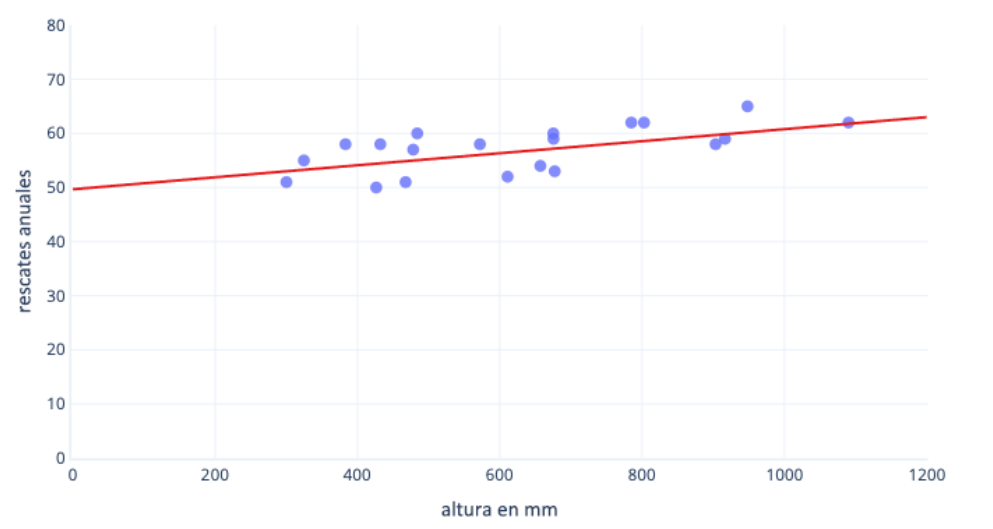

El escalado proporciona un mejor punto de partida para el aprendizaje
La línea óptima anterior tiene dos parámetros: la intersección, que es 50, y la línea en x=0 y la pendiente, que es 0,01; cada 1000 milímetros aumenta los rescates en 10. Supongamos que comenzamos el entrenamiento con estimaciones iniciales de 0 para ambos parámetros.

Si nuestras iteraciones de entrenamiento modifican los parámetros en torno a 0,01 por iteración de media, se necesitarán al menos 5000 iteraciones antes de encontrar la intersección: 50/0,01 = 5000 iteraciones. La estandarización puede acercar esta intersección óptima a cero, lo que significa que se puede identificar mucho más rápido. Por ejemplo, si restamos la media de nuestra etiqueta (rescates anuales) y nuestra característica (altura), la intersección es -0,5, en lugar de 50, de modo que podremos encontrarla unas 100 veces más rápido.

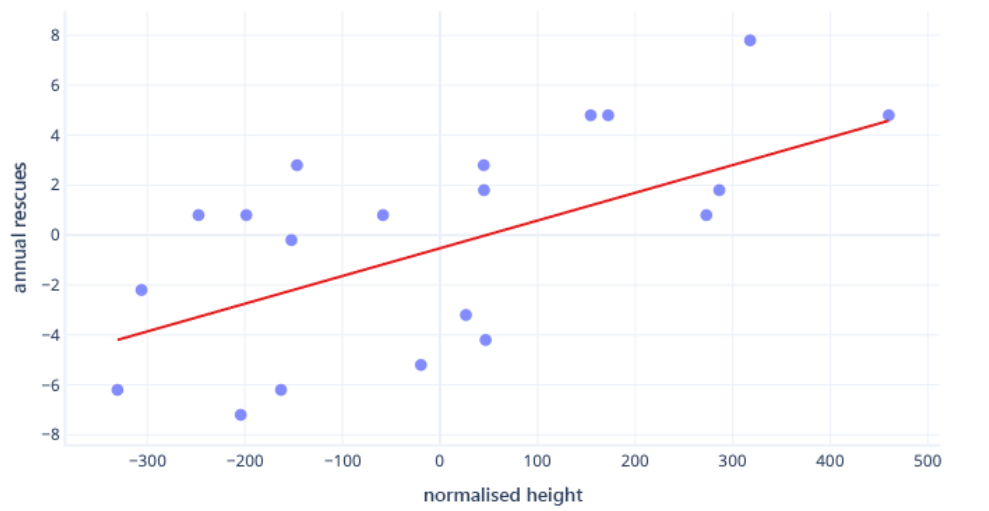

Hay otras razones por las que los modelos complejos pueden ser muy lentos de entrenar cuando la suposición inicial está lejos de la marca, pero la solución sigue siendo la misma: desplazar las características a algo más cercano a la suposición inicial.

La estandarización permite que los parámetros se entrenen a la misma velocidad
En los datos recién desplazados, tenemos un desplazamiento ideal de -0,5 y una pendiente ideal de 0,01. Aunque el desplazamiento ayuda a acelerar las cosas, sigue siendo mucho más lento entrenar el desplazamiento que entrenar la pendiente. Esto puede ralentizarlo todo y hacer que el entrenamiento sea inestable.

Por ejemplo, nuestras suposiciones iniciales de desplazamiento y pendiente son cero. Si cambiamos los parámetros en aproximadamente 0,1 en cada iteración, encontraremos el desplazamiento rápidamente, pero será muy difícil encontrar la pendiente correcta, ya que los aumentos de pendiente serán demasiado grandes (0 + 0,1 > 0,01) y pueden sobrepasar el valor ideal. Podemos reducir los ajustes, pero esto ralentizará el tiempo que se tarda en encontrar la intersección.

¿Qué ocurre si escalamos nuestra característica de altura?

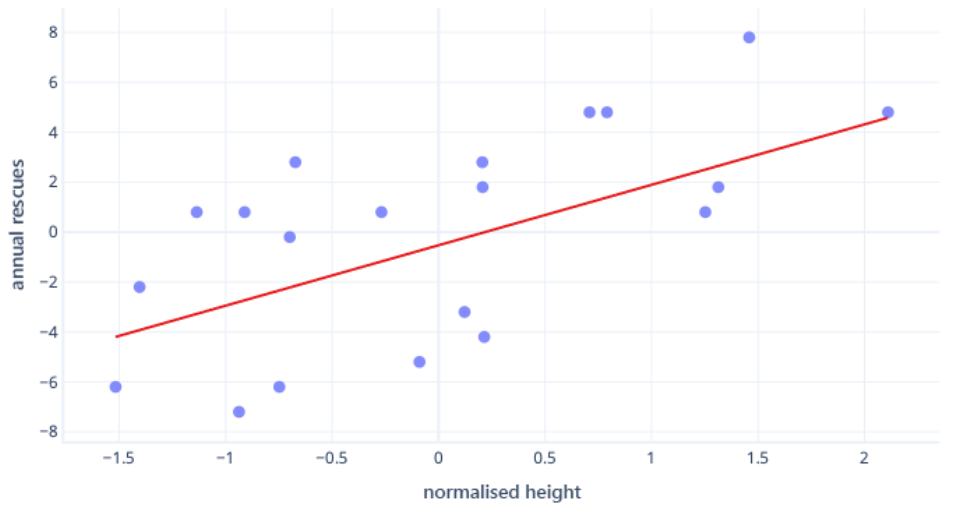

La pendiente de la línea ahora es 0,5. Preste atención al eje x. Nuestra intersección óptima de -0,5 y la pendiente de 0,5 son de la misma escala. Ahora es fácil elegir un tamaño de paso razonable, que es la rapidez con la que el descenso de gradiente actualiza los parámetros.

El escalado ayuda con varias características
Cuando se trabaja con varias características, tener estas en una escala diferente puede provocar problemas de ajuste, de forma similar a como lo acabamos de ver con los ejemplos de interceptación y pendiente. Por ejemplo, si estamos entrenando un modelo que acepta tanto la altura en mm como el peso en toneladas métricas, muchos tipos de modelos tendrán dificultades para apreciar la importancia de la característica del peso, simplemente porque es muy pequeña en relación con las características de la altura.

¿Siempre es necesario escalar?
No siempre es necesario escalar. Algunos tipos de modelos, como las líneas rectas anteriores, pueden ajustarse sin ningún procedimiento iterativo como el descenso de gradiente y, por tanto, no les importa que las características tengan un tamaño incorrecto. Otros modelos sí necesitan el escalado para que el entrenamiento sea correcto, pero sus bibliotecas suelen realizar el escalado automático de características.

Por lo general, las únicas desventajas reales de la normalización o la estandarización son que puede dificultar la interpretación de los modelos y que es necesario escribir algo más de código. Por esta razón, el escalado de características es un elemento estándar de la creación de modelos de Machine Learning.


Escalado de características
Normalizar o estandarizar son técnicas muy similares que cambian el rango de valores que tiene una característica. Hacerlo ayuda a los modelos a aprender más rápido y de manera más sólida.

Ambos procesos se conocen comúnmente como escalado de características .

En este ejercicio, usaremos un conjunto de datos de entrenamiento de perros para predecir cuántos rescates realizará un perro en un año determinado, según la edad que tenía cuando comenzó su entrenamiento.

Entrenaremos modelos con y sin escalado de características y compararemos su comportamiento y resultados.

Pero primero, carguemos nuestro conjunto de datos e inspeccionémoslo:

In [1]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m1b_gradient_descent.py
data = pandas.read_csv("dog-training.csv", delimiter="\t")
data.head()

--2023-03-30 16:38:32--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py.1’

graphing.py.1       100%[===================>]  21.01K  --.-KB/s    in 0.007s  

2023-03-30 16:38:32 (2.83 MB/s) - ‘graphing.py.1’ saved [21511/21511]

--2023-03-30 16:38:32--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent,

month_old_when_trained  mean_rescues_per_year  age_last_year  \
0                      68                   21.1              9   
1                      53                   14.9              5   
2                      41                   20.5              6   
3                       3                   19.4              1   
4                       4                   24.9              4   

   weight_last_year  rescues_last_year  
0              14.5                 35  
1              14.0                 30  
2              17.7                 34  
3              13.7                 29  
4              18.4                 30


El conjunto de datos anterior nos dice a qué edad comenzó a entrenar un perro, cuántos rescates, en promedio, ha realizado por año y otras estadísticas, como qué edad tenía el año pasado, su peso y cuántos rescates realizó en ese período.

Tenga en cuenta que también tenemos variables expresadas en diferentes unidades, como month_old_when_traineden meses, age_last_yearen años y weight_last_yearen kilogramos.

Tener características en rangos y unidades muy diferentes es un buen indicador de que un modelo puede beneficiarse del escalado de características.

Primero, entrenemos nuestro modelo usando el conjunto de datos "tal cual":

In [2]:
from m1b_gradient_descent import gradient_descent
import numpy
import graphing

# Train model using Gradient Descent
# This method uses custom code that will print out progress as training advances.
# You don't need to inspect how this works for these exercises, but if you are
# curious, you can find it in out GitHub repository
model = gradient_descent(data.month_old_when_trained, data.mean_rescues_per_year, learning_rate=5E-4, number_of_iterations=8000)


Iteration 0  Current estimate: y = 0.6551939999999999 * x + 0.01989 Cost: 285.7519204585047
Iteration 100  Current estimate: y = 0.37017703051219436 * x + 0.6317811959477302 Cost: 151.3711059205156
Iteration 200  Current estimate: y = 0.35765990734380276 * x + 1.233468946326008 Cost: 144.12794309730637
Iteration 300  Current estimate: y = 0.3454643601625017 * x + 1.819698805170826 Cost: 137.252166173823
Iteration 400  Current estimate: y = 0.33358212739619614 * x + 2.390867899414735 Cost: 130.7251406940121
Iteration 500  Current estimate: y = 0.3220051597199002 * x + 2.947363153447446 Cost: 124.52917737405625
Iteration 600  Current estimate: y = 0.3107256146029201 * x + 3.4895615512281988 Cost: 118.64748416158396
Iteration 700  Current estimate: y = 0.29973585099612604 * x + 4.01783039166423 Cost: 113.06412072651936
Iteration 800  Current estimate: y = 0.2890284241557118 * x + 4.532527537428349 Cost: 107.76395526023639
Iteration 900  Current estimate: y = 0.27859608059993735 * x + 5.03

Análisis de entrenamiento
Como puede ver en el resultado anterior, estamos imprimiendo una estimación de los pesos y el costo calculado en cada iteración.

La línea final en la salida muestra que el modelo dejó de entrenarse porque alcanzó su número máximo permitido de iteraciones, pero el costo aún podría ser menor si lo hubiéramos dejado funcionar por más tiempo.

Tracemos el modelo al final de este entrenamiento:

In [3]:
# Plot the data and trendline after training
graphing.scatter_2D(data, "month_old_when_trained", "mean_rescues_per_year", trendline=model.predict)

El gráfico anterior nos dice que cuanto más joven comienza un perro a entrenar, más rescates realiza en un año.

Tenga en cuenta que no se ajusta muy bien a los datos (la mayoría de los puntos están por encima de la línea). Eso se debe a que el entrenamiento se interrumpió antes de que el modelo pudiera encontrar los pesos óptimos.

Estandarización de datos
Usemos la estandarización como la forma de escalado de funciones para este modelo, aplicándola a la month_old_when_trainedfunción:

In [4]:
# Add the standardized verions of "age_when_trained" to the dataset.
# Notice that it "centers" the mean age around 0
data["standardized_age_when_trained"] = (data.month_old_when_trained - numpy.mean(data.month_old_when_trained)) / (numpy.std(data.month_old_when_trained))

# Print a sample of the new dataset
data[:5]

month_old_when_trained  mean_rescues_per_year  age_last_year  \
0                      68                   21.1              9   
1                      53                   14.9              5   
2                      41                   20.5              6   
3                       3                   19.4              1   
4                       4                   24.9              4   

   weight_last_year  rescues_last_year  standardized_age_when_trained  
0              14.5                 35                       1.537654  
1              14.0                 30                       0.826655  
2              17.7                 34                       0.257856  
3              13.7                 29                      -1.543342  
4              18.4                 30                      -1.495942


Observe que la standardized_age_when_trainedcolumna de valores anterior se distribuye en un rango mucho más pequeño (entre -2 y 2) y tiene su media centrada alrededor de 0.

Visualización de funciones escaladas
Usemos un diagrama de caja para comparar los valores de las características originales con sus versiones estandarizadas:

In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = px.box(data,y=["month_old_when_trained", "standardized_age_when_trained"])
fig.show()

Ahora compare las dos características pasando el mouse sobre el gráfico. Verás que:

month_old_when_trainedva de 1 a 71 y tiene su mediana centrada alrededor de 35.

standardized_age_when_trainedoscila entre -1,6381 y 1,6798 y está centrado exactamente en 0.

Entrenamiento con características estandarizadas
Ahora podemos volver a entrenar nuestro modelo usando la función estandarizada en nuestro conjunto de datos:

In [6]:
# Let's retrain our model, this time using the standardized feature
model_norm = gradient_descent(data.standardized_age_when_trained, data.mean_rescues_per_year, learning_rate=5E-4, number_of_iterations=8000)


Iteration 0  Current estimate: y = -0.002469271695567481 * x + 0.01989 Cost: 409.47558290398973
Iteration 100  Current estimate: y = -0.23732823396711047 * x + 1.9116805097144178 Cost: 336.7707406040323
Iteration 200  Current estimate: y = -0.4498267787096775 * x + 3.623357706888266 Cost: 277.25100655774355
Iteration 300  Current estimate: y = -0.6420937932658433 * x + 5.172069793284766 Cost: 228.52524594986943
Iteration 400  Current estimate: y = -0.8160554781852589 * x + 6.573332327196407 Cost: 188.63595906277715
Iteration 500  Current estimate: y = -0.9734546445990158 * x + 7.841183663924317 Cost: 155.98064104392154
Iteration 600  Current estimate: y = -1.1158681743324268 * x + 8.988325597103357 Cost: 129.24740317153262
Iteration 700  Current estimate: y = -1.2447228176779617 * x + 10.026250609868582 Cost: 107.3622692791277
Iteration 800  Current estimate: y = -1.3613094870961393 * x + 10.965357010711452 Cost: 89.44603003512722
Iteration 900  Current estimate: y = -1.466796190043848

Echemos un vistazo a esa salida de nuevo.

A pesar de que aún se permite un máximo de 8000 iteraciones, el modelo se detuvo en la marca de 5700.

¿Por qué? Porque esta vez, utilizando la función estandarizada, rápidamente pudo llegar a un punto en el que el costo ya no se podía mejorar.

En otras palabras, "convergió" mucho más rápido que la versión anterior.

Trazado del modelo estandarizado
Ahora podemos trazar el nuevo modelo y ver los resultados de la estandarización:

In [7]:
# Plot the data and trendline again, after training with standardized feature
graphing.scatter_2D(data, "standardized_age_when_trained", "mean_rescues_per_year", trendline=model_norm.predict)

¡Parece que este modelo se ajusta a los datos mucho mejor que el primero!

El modelo estandarizado muestra una pendiente más grande y los datos ahora están centrados 0en el eje X, ambos factores que deberían permitir que el modelo converja más rápido.

Pero, ¿cuánto más rápido?

Tracemos una comparación entre modelos para visualizar las mejoras.

In [8]:
cost1 = model.cost_history
cost2 = model_norm.cost_history

# Creates dataframes with the cost history for each model
df1 = pandas.DataFrame({"cost": cost1, "Model":"No feature scaling"})
df1["number of iterations"] = df1.index + 1
df2 = pandas.DataFrame({"cost": cost2, "Model":"With feature scaling"})
df2["number of iterations"] = df2.index + 1

# Concatenate dataframes into a single one that we can use in our plot
df = pandas.concat([df1, df2])

# Plot cost history for both models
fig = graphing.scatter_2D(df, label_x="number of iterations", label_y="cost", title="Training Cost vs Iterations", label_colour="Model")
fig.update_traces(mode='lines')
fig.show()

Este gráfico muestra claramente que el uso de un conjunto de datos estandarizado permitió que nuestro modelo convergiera mucho más rápido. Alcanzar el costo más bajo y encontrar los pesos óptimos requirió un número mucho menor de iteraciones.

Esto es muy importante cuando está desarrollando un nuevo modelo, ya que le permite iterar más rápido, pero también cuando su modelo se implementa en un entorno de producción, ya que requerirá menos tiempo de cómputo para el entrenamiento y costará menos que un modelo "lento". .

Resumen
En este ejercicio cubrimos los siguientes conceptos:

Las técnicas de escalado de características se utilizan para mejorar la eficiencia de los modelos de entrenamiento.
Cómo agregar una característica estandarizada a un conjunto de datos
Cómo visualizar características estandarizadas y compararlas con sus valores originales
Finalmente, comparamos el desempeño de los modelos antes y después de usar funciones estandarizadas, usando gráficos para visualizar las mejoras.

**Conjuntos de datos de prueba y entrenamiento**

Los datos que usamos para entrenar un modelo suelen denominarse conjunto de datos de entrenamiento. Ya lo hemos visto en acción. Por suerte, cuando usamos el modelo en el mundo real, después del entrenamiento, no sabemos con certeza cómo funcionará nuestro modelo. Esta incertidumbre se debe a que es posible que nuestro conjunto de datos de entrenamiento sea diferente a los datos del mundo real.

¿Qué es el sobreajuste?
Un modelo se sobreajusta si funciona mejor en los datos de entrenamiento que en otros. El nombre se refiere al hecho de que el modelo se ha ajustado tan bien que ha memorizado detalles del conjunto de entrenamiento, en lugar de buscar reglas generales que se apliquen a otros datos. El sobreajuste es habitual, pero no deseable. Al final y al cabo, solo nos importa lo bien que funciona nuestro modelo en datos del mundo real.

¿Cómo se puede evitar el sobreajuste?
El sobreajuste se puede evitar de varias maneras. La manera más sencilla es tener un modelo más sencillo o usar un conjunto de datos que sea una representación mejorada de lo que se ve en el mundo real. Para comprender estos métodos, considere un escenario en el que los datos reales tengan este aspecto:

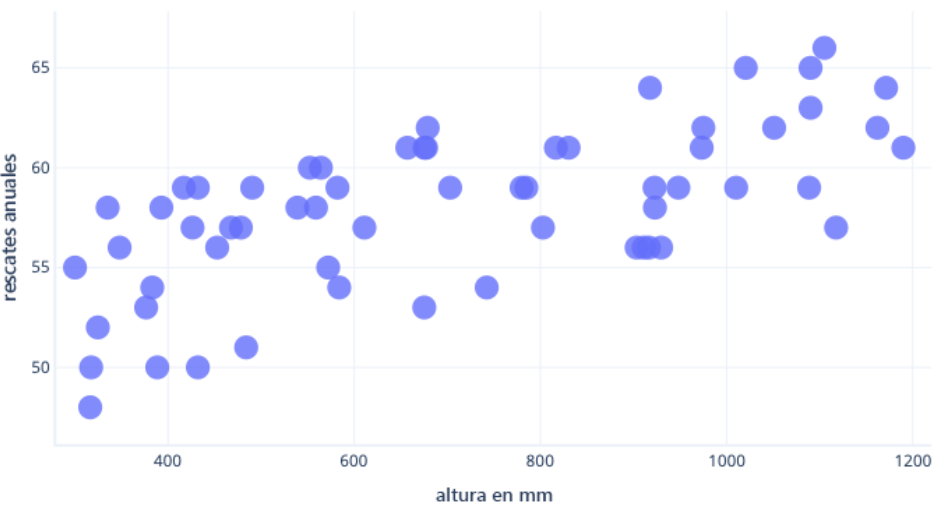

Sin embargo, supongamos que recopilamos información solo sobre cinco perros y la usamos como conjunto de datos de entrenamiento para ajustar una línea compleja. Si podemos hacerlo, podremos ajustarla muy bien:

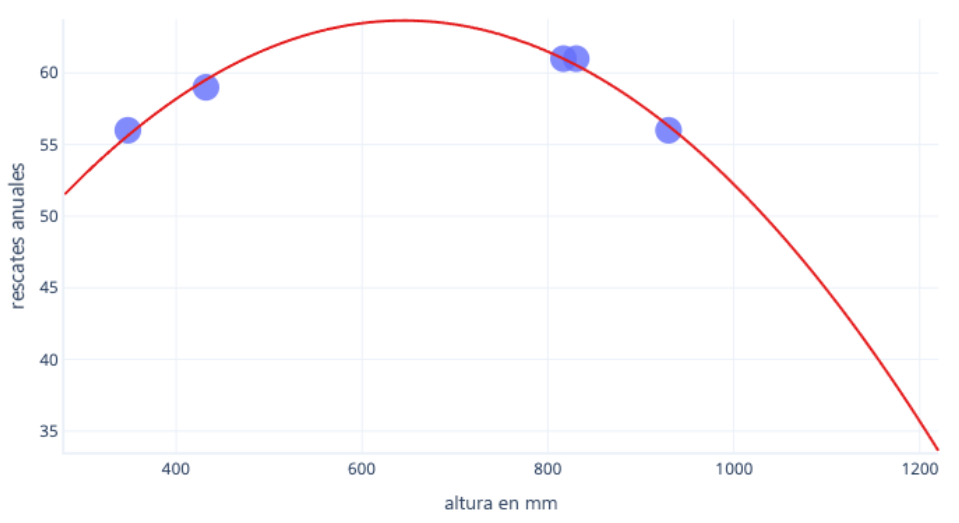

Sin embargo, cuando se use en el mundo real, veremos que realiza predicciones que resultarán incorrectas:


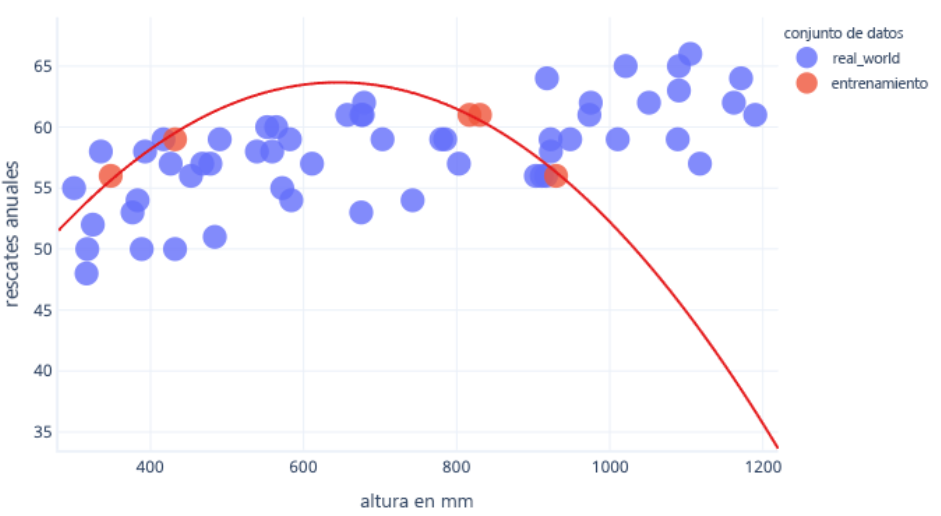

Si tuviéramos un conjunto de datos más representativo y un modelo más sencillo, la línea en la que nos ajustaríamos haría mejores predicciones, aunque no perfectas:

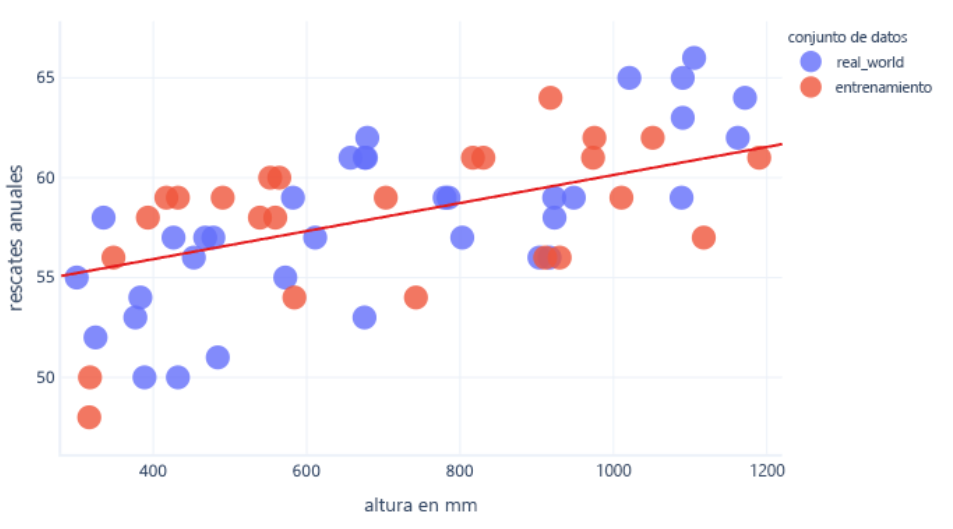

Una manera gratuita de evitar el sobreajuste es detener el entrenamiento después de que el modelo haya aprendido las reglas generales, pero antes de que se haya sobreajustado. Sin embargo, esto requiere detectar cuándo empezamos a sobreajustar el modelo. Podemos hacerlo mediante un conjunto de datos de prueba.

¿Qué es un conjunto de datos de prueba?
Un conjunto de datos de prueba, también denominado conjunto de datos de validación, es un conjunto de datos similar al conjunto de datos de entrenamiento. De hecho, los conjuntos de datos de prueba normalmente se crean tomando un conjunto de datos grande y dividiéndolo. Una parte se denomina conjunto de datos de entrenamiento y la otra, conjunto de datos de prueba.

El trabajo del conjunto de datos de entrenamiento es entrenar el modelo; ya hemos visto el entrenamiento. El trabajo del conjunto de datos de prueba es comprobar el funcionamiento del modelo; no contribuye al entrenamiento directamente.

De acuerdo, pero ¿de qué sirve esto?
Un conjunto de datos de prueba sirve para dos cosas.

En primer lugar, si el rendimiento de las pruebas deja de mejorar durante el entrenamiento, podemos detenernos, ya que no tiene sentido continuar. Si continuamos, podemos terminar animando al modelo a obtener detalles sobre el conjunto de datos de entrenamiento que no están en el conjunto de datos de prueba, lo que da lugar al sobreajuste.

En segundo lugar, podemos usar un conjunto de datos de prueba después del entrenamiento. Esto nos da una indicación de lo bien que funcionará el modelo final cuando vea datos "reales" que no haya visto antes.

¿Qué significa eso para las funciones de costo?
Cuando usamos conjuntos de datos de entrenamiento y de prueba, terminamos calculando dos funciones de costo.

La primera función de costo es usar el conjunto de datos de entrenamiento, como hemos visto antes. Esta función de costo se proporciona al optimizador y se usa para entrenar el modelo.

La segunda función de costo se calcula mediante el conjunto de datos de prueba. Esta se usa para comprobar cómo funciona el modelo en el mundo real. El resultado de la función de costo no se usa para entrenar el modelo. Para calcularlo, pausamos el entrenamiento, observamos el rendimiento del modelo en un conjunto de datos de prueba y, a continuación, reanudamos el entrenamiento.



Ejercicio: prueba y entrenamiento de conjuntos de datos

Hemos visto anteriormente cómo ajustar un modelo a un conjunto de datos. En este ejercicio, veremos cómo verificar y confirmar la validez y el rendimiento de nuestros modelos mediante el uso de conjuntos de entrenamiento y prueba. Como de costumbre, comenzamos cargando y echando un vistazo a nuestros datos:

In [9]:
import pandas
!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training-switzerland.csv

data = pandas.read_csv("dog-training.csv", delimiter="\t")

print(data.shape)
print(data.head())

--2023-03-30 16:52:14--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py.2’

graphing.py.2       100%[===================>]  21.01K  --.-KB/s    in 0.004s  

2023-03-30 16:52:14 (4.86 MB/s) - ‘graphing.py.2’ saved [21511/21511]

--2023-03-30 16:52:15--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent,


Estamos interesados ​​en la relación entre el peso de un perro y la cantidad de rescates que realizó el año anterior. Comencemos graficando rescues_last_yearcomo una función de weight_last_year:

In [10]:
import graphing
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that rescues_last_year is explained by weight_last_year
formula = "rescues_last_year ~ weight_last_year"

model = smf.ols(formula = formula, data = data).fit()

graphing.scatter_2D(data, "weight_last_year", "rescues_last_year", trendline = lambda x: model.params[1] * x + model.params[0])


Parece haber una relación bastante clara entre el peso de un perro y la cantidad de rescates que realiza. Eso parece bastante razonable, ya que esperaríamos que los perros más pesados fueran más grandes y más fuertes y, por lo tanto, ¡mejor para salvar vidas!

División de tren/prueba
Esta vez, en lugar de ajustar un modelo a la totalidad de nuestro conjunto de datos, vamos a separar nuestro conjunto de datos en dos particiones más pequeñas: un conjunto de entrenamiento y un conjunto de prueba .
El conjunto de entrenamiento es el más grande de los dos, generalmente compuesto por entre el 70 y el 80 % del conjunto de datos general, y el resto del conjunto de datos constituye el conjunto de prueba . Al dividir nuestros datos, podemos medir el rendimiento de nuestro modelo cuando nos enfrentamos a datos nunca antes vistos.

Tenga en cuenta que los datos del conjunto de prueba nunca se usan en el entrenamiento. Por esa razón, comúnmente se los conoce como datos no vistos o datos que el modelo desconoce .

In [11]:
from sklearn.model_selection import train_test_split


# Obtain the label and feature from the original data
dataset = data[['rescues_last_year','weight_last_year']]

# Split the dataset in an 70/30 train/test ratio. We also obtain the respective corresponding indices from the original dataset.
train, test = train_test_split(dataset, train_size=0.7, random_state=21)

print("Train")
print(train.head())
print(train.shape)

print("Test")
print(test.head())
print(test.shape)

Train
    rescues_last_year  weight_last_year
33                 30              19.4
0                  35              14.5
13                 36              19.5
28                 31              16.1
49                 37              23.0
(35, 2)
Test
    rescues_last_year  weight_last_year
7                  37              17.1
44                 25              15.4
43                 26              20.0
25                 32              22.2
14                 32              18.3
(15, 2)



Podemos ver que estos conjuntos son diferentes y que el conjunto de entrenamiento y el conjunto de prueba contienen el 70 % y el 30 % de los datos totales, respectivamente.

Veamos cómo se separan el conjunto de entrenamiento y el conjunto de prueba :

In [12]:
# You don't need to understand this code well
# It's just used to create a scatter plot

# concatenate training and test so they can be graphed
plot_set = pandas.concat([train,test])
plot_set["Dataset"] = ["train"] * len(train) + ["test"] * len(test)

# Create graph
graphing.scatter_2D(plot_set, "weight_last_year", "rescues_last_year", "Dataset", trendline = lambda x: model.params[1] * x + model.params[0])

Conjunto de entrenamiento
Comenzamos entrenando nuestro modelo usando el conjunto de entrenamiento y probando su desempeño con el mismo conjunto de entrenamiento :

In [14]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

# First, we define our formula using a special syntax
# This says that rescues_last_year is explained by weight_last_year
formula = "rescues_last_year ~ weight_last_year"

# Create and train the model
model = smf.ols(formula = formula, data = train).fit()

# Graph the result against the data
graphing.scatter_2D(train, "weight_last_year", "rescues_last_year", trendline = lambda x: model.params[1] * x + model.params[0])

Podemos medir el rendimiento de nuestro modelo calculando el error cuadrático medio (MSE).



In [15]:
# We use the in-buit sklearn function to calculate the MSE
correct_labels = train['rescues_last_year']
predicted = model.predict(train['weight_last_year'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 18.674546 


Equipo de prueba
A continuación, probamos el rendimiento del mismo modelo usando el conjunto de prueba :

In [16]:
graphing.scatter_2D(test, "weight_last_year", "rescues_last_year", trendline = lambda x: model.params[1] * x + model.params[0])

Echemos un vistazo a la MSE de nuevo.

In [17]:
correct_labels = test['rescues_last_year']
predicted = model.predict(test['weight_last_year'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 24.352949 


Podemos ver que el modelo funciona mucho mejor con los datos de entrenamiento conocidos que con los datos de prueba no vistos (recuerde que los valores más altos de MSE son peores).

Esto puede deberse a una serie de factores, pero el primero y más importante es el sobreajuste , que es cuando un modelo coincide demasiado con los datos del conjunto de entrenamiento . Esto significa que funcionará muy bien en el conjunto de entrenamiento , pero no se generalizará bien. (es decir, funcionan bien con otros conjuntos de datos).


Nuevo conjunto de datos
Para ilustrar aún más nuestro punto, echemos un vistazo a cómo funciona nuestro modelo cuando se enfrenta a un conjunto de datos completamente nuevo, invisible y más grande. Para nuestro escenario, utilizaremos los datos proporcionados por la rama europea de la organización benéfica de rescate de avalanchas.

In [18]:
# Load an alternative dataset from the charity's European branch
new_data = pandas.read_csv("dog-training-switzerland.csv", delimiter="\t")

print(new_data.shape)
new_data.head()


(500, 5)


month_old_when_trained  mean_rescues_per_year  age_last_year  \
0                       9                   16.7              2   
1                      33                   24.2              8   
2                      43                   20.2              4   
3                      37                   19.2              5   
4                      45                   16.9              8   

   weight_last_year  rescues_last_year  
0         15.709342                 30  
1         14.760819                 35  
2         13.118374                 19  
3         10.614075                 24  
4         17.519890                 28

Las características son las mismas, pero esta vez tenemos muchos más datos. ¡Veamos cómo le va a nuestro modelo!



In [ ]:
# Plot the fitted model against this new dataset. 

graphing.scatter_2D(new_data, "weight_last_year", "rescues_last_year", trendline = lambda x: model.params[1] * x + model.params[0])


Y ahora el MSE:

In [19]:
correct_labels = new_data['rescues_last_year']
predicted = model.predict(new_data['weight_last_year'])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 20.406905 



Como era de esperar, el modelo funciona mejor en el conjunto de datos de entrenamiento que en el conjunto de datos no visto. Esto se debe simplemente al sobreajuste, como vimos anteriormente.

Curiosamente, el modelo funciona mejor en este conjunto de datos invisible que en el conjunto de prueba . Esto se debe a que nuestro conjunto de pruebas anterior era bastante pequeño y, por lo tanto, no representaba muy bien los datos del "mundo real". Por el contrario, este conjunto de datos invisible es grande y una representación mucho mejor de los datos que encontraremos fuera del laboratorio. En esencia, esto nos muestra que parte de la diferencia de rendimiento que vemos entre el entrenamiento y la prueba se debe al sobreajuste del modelo, y parte del error se debe a que el conjunto de prueba no es perfecto. En los próximos ejercicios, exploraremos el equilibrio que tenemos que hacer entre los tamaños de los conjuntos de datos de entrenamiento y de prueba.

Resumen
En este ejercicio cubrimos los siguientes conceptos:

Dividir un conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba .
Entrenar un modelo usando el conjunto de entrenamiento y probar su rendimiento en el conjunto de entrenamiento , el conjunto de prueba y en un conjunto de datos nuevo e invisible.
Comparó las MSEs respectivas para resaltar los efectos y peligros del sobreajuste .

**Matices de los conjuntos de pruebas**

Los conjuntos de pruebas se consideran procedimientos recomendados para la mayoría de los aspectos del aprendizaje automático, aunque el campo sigue siendo relativamente pequeño y, por tanto, se debate exactamente cómo y cuándo. Veamos algunos aspectos que se deben tener en cuenta.

Los conjuntos de pruebas pueden ser engañosos
Aunque los conjuntos de pruebas son útiles para identificar el sobreentrenamiento, pueden proporcionarnos una confianza falsa. En concreto, los conjuntos de pruebas solo son útiles si reflejan datos que esperamos ver en el mundo real. Por ejemplo, nuestro conjunto de pruebas es muy pequeño y no representará la variedad de datos que es probable que se vean en el mundo real. Así mismo, los conjuntos de datos de prueba solo son tan buenos como su origen. Si el conjunto de datos de prueba procede de un origen sesgado, nuestras métricas no reflejarán el comportamiento en el mundo real.

Por ejemplo, supongamos que estamos intentando encontrar la relación entre el número de rescates y la edad a la que un perro empezó a entrenar. Si nuestro conjunto de pruebas solo contaba con tres perros, es posible que estos perros no sean una buena representación de la amplia variedad de perros de trabajo en el mundo real. Además, imagine que obtenemos nuestro conjunto de pruebas de un solo criador, que no sabe cómo trabajar con cachorros. Nuestro modelo podría predecir que los perros más mayores son los mejores para entrenar, y nuestro conjunto de datos de prueba lo confirmaría, cuando de hecho otros instructores podrían tener un éxito enorme con animales más jóvenes.

Los conjuntos de pruebas no son gratuitos
Ya hemos visto que cuantos más datos de entrenamiento tengamos, menos probable será que nuestro modelo se sobreajuste. Del mismo modo, cuanto más grandes sean los conjuntos de pruebas, más confianza tendremos en los resultados de las mismas. Sin embargo, normalmente trabajamos con cantidades finitas de datos y un punto de datos no puede estar en el conjunto de entrenamiento y en el de prueba. Esto significa que, a medida que obtenemos conjuntos de pruebas más grandes, también obtenemos conjuntos de datos de entrenamiento más pequeños y viceversa. La cantidad exacta de datos que hay que sacrificar para que aparezcan en el conjunto de datos de prueba depende de las circunstancias individuales. Lo más relativamente común es entre un 10 y un 50 %, según el volumen de datos disponibles.

Entrenar y probar no es el único enfoque
Merece la pena tener en cuenta que el enfoque de entrenar y probar es habitual, pero no es el único que se utiliza. Dos de las alternativas más comunes son el enfoque de exclusión y los métodos estadísticos.

El enfoque de exclusión
El enfoque de exclusión es como el de entrenar y probar, pero en lugar de dividir un conjunto de datos en dos, se divide en tres: entrenamiento, prueba (también conocida como validación) y espera. Los conjuntos de datos de entrenamiento y prueba son los que se han descrito anteriormente. El conjunto de datos de exclusión es un tipo de conjunto de pruebas que se usa solo una vez, cuando estamos listos para implementar nuestro modelo para su uso real. En otras palabras, no se usa hasta que hayamos terminado de experimentar con diferentes tipos de prácticas de entrenamiento, distintos tipos de modelos, etc.

Este enfoque aborda el hecho de que normalmente experimentamos con diferentes modelos y prácticas de entrenamiento. Por ejemplo, ajustamos un modelo, descubrimos que no funciona bien con el conjunto de datos de prueba, cambiamos algunos aspectos del modelo entrenado y lo volvemos a intentar hasta obtener un buen resultado. Esto significa que estamos modificando a propósito el modelo para que funcione para un conjunto determinado de datos, al igual que lo hace el entrenamiento normal con el conjunto de datos de entrenamiento. Al hacerlo, podemos acabar con un modelo que básicamente está demasiado entrenado para funcionar en nuestro conjunto de datos de prueba.

La idea de un tercer conjunto de datos es que también podemos probarlo. Este enfoque significa dividir los datos de tres maneras, lo que implica que empezamos con incluso menos datos de entrenamiento. Si no tenemos muchos datos con los que trabajar, este enfoque puede reducir nuestra capacidad de obtener un buen modelo.

Enfoques estadísticos
Los modelos más sencillos que se han originado en las estadísticas a menudo no necesitan conjuntos de datos de prueba. En cambio, el grado de sobreajuste del modelo puede calcularse directamente como significación estadística: un "valor p".

Estos métodos estadísticos son eficaces, están bien establecidos y forman la base de la ciencia moderna. La ventaja es que el conjunto de entrenamiento no tiene que dividirse nunca y obtenemos una comprensión mucho más precisa de la confianza que podemos tener sobre un modelo. Por ejemplo, un valor p de 0,01 significa que hay una probabilidad muy pequeña de que nuestro modelo haya encontrado una relación que realmente no exista en el mundo real. Por el contrario, un valor p de 0,5 significa que, aunque nuestro modelo podría ser bueno con nuestros datos de entrenamiento, no será mejor que lanzar una moneda al aire en el mundo real.

El inconveniente de estos enfoques es que solo se aplican fácilmente a determinados tipos de modelos, como los modelos de regresión lineal con los que hemos estado trabajando. Para todos los modelos, salvo los más sencillos, estos cálculos pueden ser extremadamente complejos de realizar correctamente, por lo que están fuera del alcance de este curso. También sufren la misma limitación con respecto a la selección de datos: si nuestros datos de entrenamiento están sesgados, nuestros valores p serán engañosos.

EJERCICIO: Conjuntos de pruebas en profundidad
En el ejercicio anterior, vimos cómo dividir nuestros datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

Ahora repetiremos el último ejercicio, pero esta vez veremos qué sucede cuando dividimos los datos en diferentes formas y proporciones.

Primero recordemos lo que hay en nuestro conjunto de datos:

In [20]:
import pandas
!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training-switzerland.csv
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
import graphing

data = pandas.read_csv("dog-training.csv", delimiter="\t")

print(f"Dataset shape: {data.shape}")
data.head()

--2023-03-30 17:06:43--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 974 [text/plain]
Saving to: ‘dog-training.csv.2’

dog-training.csv.2  100%[===================>]     974  --.-KB/s    in 0s      

2023-03-30 17:06:44 (39.4 MB/s) - ‘dog-training.csv.2’ saved [974/974]

--2023-03-30 17:06:44--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training-switzerland.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

month_old_when_trained  mean_rescues_per_year  age_last_year  \
0                      68                   21.1              9   
1                      53                   14.9              5   
2                      41                   20.5              6   
3                       3                   19.4              1   
4                       4                   24.9              4   

   weight_last_year  rescues_last_year  
0              14.5                 35  
1              14.0                 30  
2              17.7                 34  
3              13.7                 29  
4              18.4                 30

Hagamos un resumen rápido de cómo se ve la distribución de nuestros datos (recuerde que estábamos usando weight_last_yearpara predecir el valor de rescues_last_year).

In [21]:
# Obtain the label and feature from the original data
dataset = data[['rescues_last_year','weight_last_year']]

# Print the number of observations
print("No. observations:", dataset.shape[0])

# Graph the distribution of variables for the unsplit dataset
graphing.scatter_2D(dataset, 'rescues_last_year', 'weight_last_year')

No. observations: 50


Observe que tenemos 50 observaciones graficadas (lo que corresponde al número de muestras en el conjunto de datos).

Comparación de proporción de división de conjuntos de datos
Ahora dividiremos nuestro conjunto de datos utilizando diferentes proporciones para comprender cómo pueden afectar a nuestros modelos.

In [22]:
from sklearn.model_selection import train_test_split

# Split Dataset using different ratios 50:50, 60:40, 70:30, 80:20
train_5050, test_5050 = train_test_split(dataset, test_size=0.5, random_state=2)
train_6040, test_6040 = train_test_split(dataset, test_size=0.4, random_state=2)
train_7030, test_7030 = train_test_split(dataset, test_size=0.3, random_state=2)
train_8020, test_8020 = train_test_split(dataset, test_size=0.2, random_state=2)

# Add a column to each set to identify if a datapoint belongs to "train" or "test"
train_5050, test_5050 = train_5050.assign(Set="train"), test_5050.assign(Set="test")
train_6040, test_6040 = train_6040.assign(Set="train"), test_6040.assign(Set="test")
train_7030, test_7030 = train_7030.assign(Set="train"), test_7030.assign(Set="test")
train_8020, test_8020 = train_8020.assign(Set="train"), test_8020.assign(Set="test")

# Concatenate the "train" and "test" sets for each split so we can plot them on the same chart
df_5050 = pandas.concat([train_5050, test_5050], axis=0)
df_6040 = pandas.concat([train_6040, test_6040], axis=0)
df_7030 = pandas.concat([train_7030, test_7030], axis=0)
df_8020 = pandas.concat([train_8020, test_8020], axis=0)

# Plot each distribution for comparison
graphing.scatter_2D(df_5050, "weight_last_year", "rescues_last_year", title="50:50 split", label_colour="Set", show=True)
graphing.scatter_2D(df_6040, "weight_last_year", "rescues_last_year", title="60:40 split", label_colour="Set", show=True)
graphing.scatter_2D(df_7030, "weight_last_year", "rescues_last_year", title="70:30 split", label_colour="Set", show=True)
graphing.scatter_2D(df_8020, "weight_last_year", "rescues_last_year", title="80:20 split", label_colour="Set")

Observe cómo las primeras divisiones nos dejan con conjuntos de datos de entrenamiento relativamente pequeños . En la división 50:50, solo tenemos 25 muestras para entrenar.

Estos últimos, en cambio, nos dejan muchos más datos para entrenar, pero relativamente pocos para testear. ¡La división 80:20 nos deja con solo 10 muestras en el conjunto de prueba !

Echemos un vistazo a las distribuciones de datos de entrenamiento para cada división:



In [23]:
# Add a column for each "train" set that identifies the split used
train_8020 = train_8020.assign(Split="80:20")
train_7030 = train_7030.assign(Split="70:30")
train_6040 = train_6040.assign(Split="60:40")
train_5050 = train_5050.assign(Split="50:50")

# Concatenate training sets so we can plot them on the same chart
split_df = pandas.concat([train_5050, train_6040, train_7030, train_8020], axis=0)

 # Plot a histogram of data distribution
graphing.multiple_histogram(split_df, label_x="rescues_last_year", label_group="Split", title="Distribution of Training data")

Podemos sacar un par de conclusiones del gráfico anterior:

La train_test_split()función que usamos hace un trabajo bastante bueno al mantener una distribución justa de datos en diferentes proporciones. Intenta mantener diferentes valores representados en la misma proporción.

Sin embargo, cuando usamos una 50:50relación, tenemos que dejar tantos datos fuera del conjunto de trenes que ¡algunos valores ya no están presentes! (¿puedes ver dónde faltan las barras azules?)

El punto 2es especialmente preocupante ya que si esos datos no están disponibles para el entrenamiento, nuestro modelo no puede aprender de ellos y, por lo tanto, no hará predicciones precisas. En otras palabras, ¡usar una 50:50división no parece una buena idea para este conjunto de datos!


Ajuste y evaluación de modelos con diferentes relaciones de división
Ajustemos modelos usando diferentes divisiones, luego veamos cómo parecen funcionar:

In [24]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

def train_and_test_model(name, train, test):
    '''
    This method creates a model, trains it on the provided data, and assesses 
    it against the test data
    '''
    # This formula says that rescues_last_year is explained by weight_last_year
    formula = "rescues_last_year ~ weight_last_year"

    # Create and train a linear regression model using the training data
    model = smf.ols(formula = formula, data = train).fit()

    # Now evaluate the model (by calculating the Mean Squared Error) using the 
    # corresponding "test" set for that split
    correct_answers = test['rescues_last_year']
    predictions = model.predict(test['weight_last_year'])
    MSE = mse(correct_answers, predictions)
    print(name + ' MSE = %f ' % MSE)

    return model


# Train a model and test it for each kind of split
print("Mean Squared Error values (smaller is better)")
model_5050 = train_and_test_model("50:50", train_5050, test_5050)
model_6040 = train_and_test_model("60:40", train_6040, test_6040)
model_7030 = train_and_test_model("70:30", train_7030, test_7030)
model_8020 = train_and_test_model("80:20", train_8020, test_8020)

Mean Squared Error values (smaller is better)
50:50 MSE = 21.930788 
60:40 MSE = 19.834762 
70:30 MSE = 23.747817 
80:20 MSE = 18.441786 


El código anterior entrena un modelo para cada relación, utilizando el conjunto de trenes correspondiente para esa relación. Luego calcula el MSE (error cuadrático medio) para cada modelo, utilizando su conjunto de prueba correspondiente .

Los resultados parecen mixtos. La 80:20proporción fue la mejor, pero no hay un patrón claro en cuanto a si es útil aumentar o reducir el conjunto de entrenamiento.

Dos cosas están influyendo en nuestros resultados. En primer lugar, cuanto más grande sea el conjunto de pruebas , más podemos confiar en los resultados de las pruebas. En segundo lugar, los modelos generalmente entrenarán mejor con conjuntos de entrenamiento más grandes.

Estas influencias están en desacuerdo entre sí, y su influencia se exagera aquí porque nuestro conjunto de datos es muy pequeño. En esta situación particular, es difícil evaluar si la 60:40división es realmente mejor que la 70:30división, por ejemplo. Esto se debe a que 70:30 splitpodría dar la apariencia de ser peor porque se probó con un conjunto de prueba menos representativo (más pequeño).

Evaluación del modelo
Echemos un vistazo ahora a lo que sucede cuando estos modelos se utilizan en un conjunto de datos mucho más grande en el que no se entrenó ni se probó. Esto puede suceder en el mundo real porque elegimos retener los datos al principio, o simplemente porque recopilamos datos después de entrenar nuestro modelo. En nuestro escenario actual, estos son nuevos datos que nos ha proporcionado el brazo europeo de nuestra organización benéfica de rescate de avalanchas.

In [25]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

# Load some dog statistics from our charity's European arm
swiss_data = pandas.read_csv("dog-training-switzerland.csv", delimiter="\t")

# Show show information about the data
print(f"The Swiss dataset contains {swiss_data.shape[0]} samples")
graphing.scatter_2D(swiss_data, 'rescues_last_year', 'weight_last_year')

The Swiss dataset contains 500 samples



Esta es claramente una muestra mucho más grande de datos. Veamos cómo funcionan nuestros modelos. Tenga en cuenta que no estamos volviendo a entrenar los modelos aquí; simplemente los estamos usando para hacer predicciones sobre un nuevo conjunto de datos para evaluar qué tan bien se desempeñan.

In [26]:
# Test our models against the swiss data
features = swiss_data['weight_last_year']
correct_answers = swiss_data['rescues_last_year']

# We will now assess our models. Notice we're not training them again.
# We are simply testing them against some new data 

# Assess the model trained on a 50:50 split
predictions = model_5050.predict(features)
MSE = mse(correct_answers, predictions)
print('50:50 MSE = %f ' % MSE)

# Assess the model trained on a 60:40 split
predictions = model_6040.predict(features)
MSE = mse(correct_answers, predictions)
print('60:40 MSE = %f ' % MSE)

# Assess the model trained on a 70:30 split
predictions = model_7030.predict(features)
MSE = mse(correct_answers, predictions)
print('70:30 MSE = %f ' % MSE)

# Assess the model trained on a 80:20 split
predictions = model_8020.predict(features)
MSE = mse(correct_answers, predictions)
print('80:20 MSE = %f ' % MSE)

50:50 MSE = 20.903325 
60:40 MSE = 20.520190 
70:30 MSE = 20.355991 
80:20 MSE = 20.061225 


Con este conjunto de datos más grande, el modelo que se usa para 80:20dividir produjo el error más bajo y, por lo tanto, el mejor rendimiento. También hay un patrón claro, donde cuanto mayor sea el conjunto de datos de entrenamiento, mejor podría funcionar el modelo después del entrenamiento.

Juntos, esto muestra que debemos probar y evaluar diferentes divisiones de entrenamiento/prueba al construir modelos de aprendizaje automático y que, en general , las divisiones que favorecen el conjunto de entrenamiento con más datos producirán mejores resultados.

Resumen
En este ejercicio aprendiste los siguientes conceptos:

Puede usar diferentes proporciones al dividir su conjunto de datos en conjuntos de entrenamiento y prueba .
Diferentes proporciones producen diferentes distribuciones de variables en los conjuntos de prueba y tren resultantes .
Cuando las proporciones de entrenamiento: prueba están cerca, es posible que esté dejando una gran cantidad de datos fuera del conjunto de entrenamiento y eso puede tener un impacto negativo en el rendimiento de su modelo.
Al construir modelos, es importante probarlos usando diferentes divisiones de entrenamiento/prueba. La simple asignación de más datos al conjunto de trenes no siempre garantiza los mejores resultados.